In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("Rainfall_Data_LL.csv")
df.head()

,Name,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude
0,ROW1,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,...,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,12.61124,92.83165
1,ROW2,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,...,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,12.61124,92.83165
2,ROW3,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,...,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,12.61124,92.83165
3,ROW4,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,...,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,12.61124,92.83165
4,ROW5,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,...,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,12.61124,92.83165


In [4]:
null_counts = df.isnull().sum()
# Print the number of null values
print(f"{null_counts.sum()} null entries have been found in the dfset\n")
# Drop null values
df.dropna(inplace=True)          # or df_df = df_df.dropna()

# Find and handle duplicates
duplicate_count = df.duplicated().sum()
# Print the number of duplicate entries
print(f"{duplicate_count} duplicate entries have been found in the dfset\n")
# Remove duplicates
df.drop_duplicates(inplace=True)  # or df_df = df_df.drop_duplicates()
# Display relative message
print(f"All duplicates have been removed\n")

# Reset the indexes
df.reset_index(drop=True, inplace=True)

# Inspect the dfset for categorical columns
print("Categorical columns:",df.select_dtypes(include=['object']).columns.tolist(),'\n')

# Print the first 5 lines
df.head()

0 null entries have been found in the dfset

0 duplicate entries have been found in the dfset

All duplicates have been removed

Categorical columns: ['Name', 'SUBDIVISION'] 



,Name,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude
0,ROW1,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,...,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,12.61124,92.83165
1,ROW2,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,...,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,12.61124,92.83165
2,ROW3,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,...,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,12.61124,92.83165
3,ROW4,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,...,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,12.61124,92.83165
4,ROW5,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,...,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,12.61124,92.83165


In [5]:
df.columns

Index(['Name', 'SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb',
       'Mar-May', 'June-September', 'Oct-Dec', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
df = df[['SUBDIVISION', 'YEAR', 'Jan-Feb','Mar-May', 'June-September', 'Oct-Dec', 'Latitude', 'Longitude', 'ANNUAL']]
df.head()

,SUBDIVISION,YEAR,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude,ANNUAL
0,Andaman & Nicobar Islands,1901,136.3,560.3,1696.3,980.3,12.61124,92.83165,3373.2
1,Andaman & Nicobar Islands,1902,159.8,458.3,2185.9,716.7,12.61124,92.83165,3520.7
2,Andaman & Nicobar Islands,1903,156.7,236.1,1874.0,690.6,12.61124,92.83165,2957.4
3,Andaman & Nicobar Islands,1904,24.1,506.9,1977.6,571.0,12.61124,92.83165,3079.6
4,Andaman & Nicobar Islands,1905,1.3,309.7,1624.9,630.8,12.61124,92.83165,2566.7


In [7]:
# Define Function for Classification
def classify_rainfall(rainfall):
    if rainfall < 800:
        return "Low"
    elif 800 <= rainfall < 1500:
        return "Moderate"
    else:
        return "High"

In [8]:
df['target'] = df['ANNUAL'].apply(classify_rainfall)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUBDIVISION     4187 non-null   object 
 1   YEAR            4187 non-null   int64  
 2   Jan-Feb         4187 non-null   float64
 3   Mar-May         4187 non-null   float64
 4   June-September  4187 non-null   float64
 5   Oct-Dec         4187 non-null   float64
 6   Latitude        4187 non-null   float64
 7   Longitude       4187 non-null   float64
 8   ANNUAL          4187 non-null   float64
 9   target          4187 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 327.2+ KB


In [10]:
df['SUBDIVISION'].value_counts()

West Madhya Pradesh                   117
East Rajasthan                        117
Coastal Karnataka                     117
Tamil Nadu                            117
Rayalseema                            117
Telangana                             117
Coastal Andhra Pradesh                117
Chhattisgarh                          117
Vidarbha                              117
Matathwada                            117
Madhya Maharashtra                    117
Konkan & Goa                          117
Saurashtra & Kutch                    117
Gujarat Region                        117
East Madhya Pradesh                   117
Kerala                                117
West Rajasthan                        117
South Interior Karnataka              117
Jammu & Kashmir                       117
Himachal Pradesh                      117
Punjab                                117
Haryana Delhi & Chandigarh            117
Uttarakhand                           117
West Uttar Pradesh                

In [11]:
df['target'].value_counts()

Moderate    1903
High        1249
Low         1035
Name: target, dtype: int64

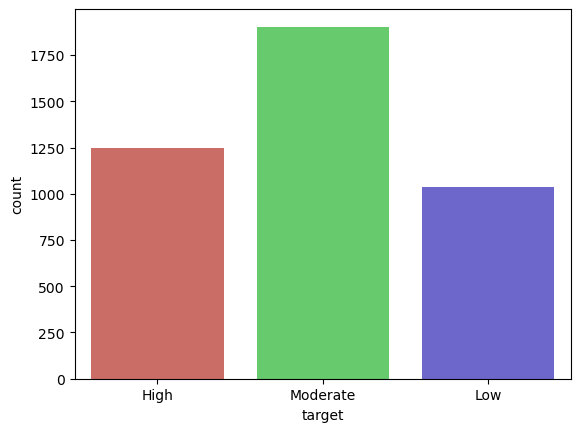

In [12]:
sns.countplot(x='target',data=df, palette='hls')
plt.show()

# Label Encoding

In [13]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df[['SUBDIVISION', 'target']] = df[['SUBDIVISION', 'target']].apply(label_encoder.fit_transform)

In [14]:
df.head()

,SUBDIVISION,YEAR,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude,ANNUAL,target
0,0,1901,136.3,560.3,1696.3,980.3,12.61124,92.83165,3373.2,0
1,0,1902,159.8,458.3,2185.9,716.7,12.61124,92.83165,3520.7,0
2,0,1903,156.7,236.1,1874.0,690.6,12.61124,92.83165,2957.4,0
3,0,1904,24.1,506.9,1977.6,571.0,12.61124,92.83165,3079.6,0
4,0,1905,1.3,309.7,1624.9,630.8,12.61124,92.83165,2566.7,0


In [15]:
df.to_csv('processed.csv')

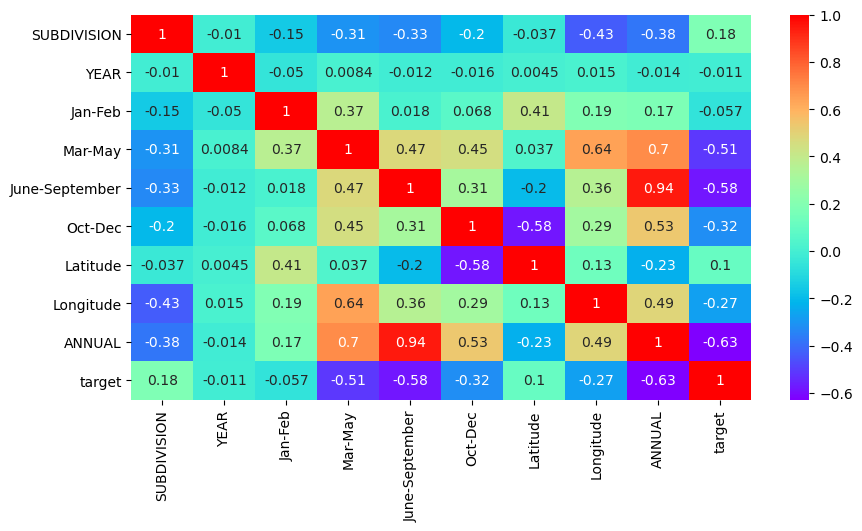

In [16]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()

In [17]:
ML_Model = []
accuracy = []
precision = []
recall = []

f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop(['target'], axis= 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [19]:
from seaborn import heatmap
from sklearn.metrics import classification_report , confusion_matrix

def cnf_matrix(y_test, y_pred):
    print('-------------------------Confusion_Matrix--------------------')
    
    heatmap(confusion_matrix(y_test, y_pred),annot = True,fmt='d')
    print (classification_report(y_test, y_pred))

# LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred    = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [21]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr, X, y, cv=5)  # 5-Fold Cross Validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.97732697 0.98926014 0.97491039 0.97371565 0.98207885]
Mean CV Score: 0.9794584021237343


In [22]:
storeResults('LogisticRegression', lr_acc, lr_prec, lr_rec, lr_f1)

-------------------------Confusion_Matrix--------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       271
           1       0.99      0.97      0.98       204
           2       0.97      0.99      0.98       363

    accuracy                           0.98       838
   macro avg       0.98      0.98      0.98       838
weighted avg       0.98      0.98      0.98       838



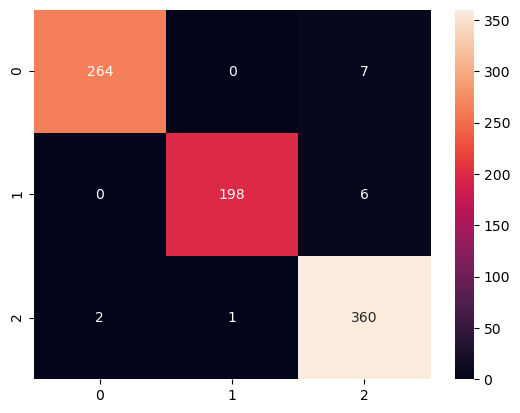

In [23]:
Confusion_Matrix = cnf_matrix(y_test, y_pred)

# RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred    = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [25]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X, y, cv=5)  # 5-Fold Cross Validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.99880668 1.         0.99880526 1.         1.        ]
Mean CV Score: 0.9995223878894677


In [26]:
storeResults('RandomForest', rf_acc, rf_prec, rf_rec, rf_f1)

-------------------------Confusion_Matrix--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00       363

    accuracy                           1.00       838
   macro avg       1.00      1.00      1.00       838
weighted avg       1.00      1.00      1.00       838



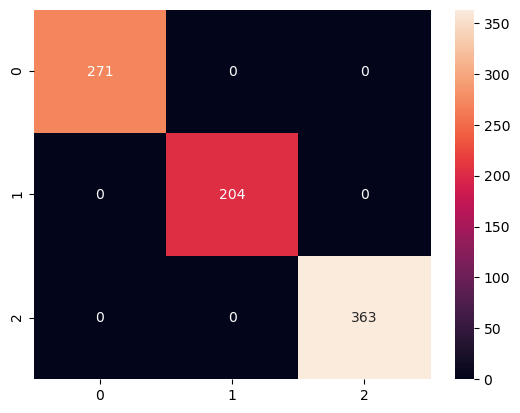

In [27]:
Confusion_Matrix = cnf_matrix(y_test, y_pred)

# DecisionTree

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred    = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [29]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt, X, y, cv=5)  # 5-Fold Cross Validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.99880668 1.         0.99880526 1.         1.        ]
Mean CV Score: 0.9995223878894677


In [30]:
storeResults('DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

-------------------------Confusion_Matrix--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00       363

    accuracy                           1.00       838
   macro avg       1.00      1.00      1.00       838
weighted avg       1.00      1.00      1.00       838



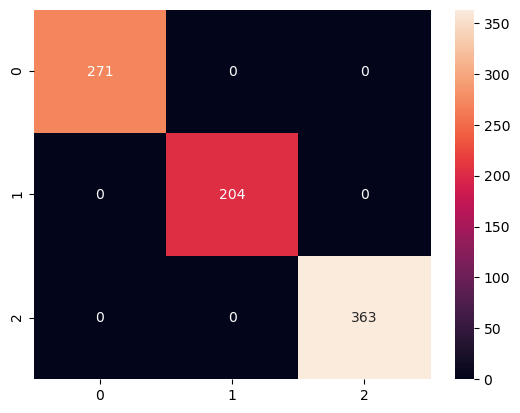

In [31]:
Confusion_Matrix = cnf_matrix(y_test, y_pred)

# Neural Network

In [32]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()

nn.fit(X_train, y_train)

y_pred    = nn.predict(X_test)

nn_acc = accuracy_score(y_pred, y_test)
nn_prec = precision_score(y_pred, y_test,average='weighted')
nn_rec = recall_score(y_pred, y_test,average='weighted')
nn_f1 = f1_score(y_pred, y_test,average='weighted')

In [33]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(nn, X, y, cv=5)  # 5-Fold Cross Validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.9797136  0.95704057 0.9474313  0.97013142 0.95221027]
Mean CV Score: 0.9613054350832471


In [34]:
storeResults('Neural Network', nn_acc, nn_prec, nn_rec, nn_f1)

-------------------------Confusion_Matrix--------------------
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       271
           1       1.00      0.95      0.97       204
           2       0.94      1.00      0.97       363

    accuracy                           0.97       838
   macro avg       0.98      0.97      0.97       838
weighted avg       0.97      0.97      0.97       838



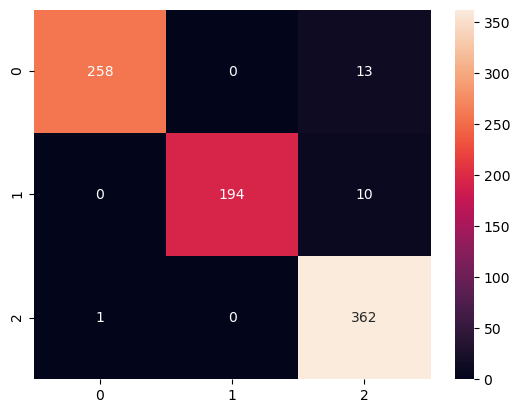

In [35]:
Confusion_Matrix = cnf_matrix(y_test, y_pred)

# LightGBM

In [36]:
from  lightgbm import LGBMClassifier

lgb = LGBMClassifier()

lgb.fit(X_train, y_train)

y_pred    = lgb.predict(X_test)

lgb_acc = accuracy_score(y_pred, y_test)
lgb_prec = precision_score(y_pred, y_test,average='weighted')
lgb_rec = recall_score(y_pred, y_test,average='weighted')
lgb_f1 = f1_score(y_pred, y_test,average='weighted')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1503
[LightGBM] [Info] Number of data points in the train set: 3349, number of used features: 9
[LightGBM] [Info] Start training from score -1.230907
[LightGBM] [Info] Start training from score -1.393787
[LightGBM] [Info] Start training from score -0.776879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [37]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lgb, X, y, cv=5)  # 5-Fold Cross Validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1498
[LightGBM] [Info] Number of data points in the train set: 3349, number of used features: 9
[LightGBM] [Info] Start training from score -1.209662
[LightGBM] [Info] Start training from score -1.397404
[LightGBM] [Info] Start training from score -0.788637
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [38]:
storeResults('LightGBM', lgb_acc, lgb_prec, lgb_rec, lgb_f1)

-------------------------Confusion_Matrix--------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       271
           1       1.00      0.99      0.99       204
           2       0.98      1.00      0.99       363

    accuracy                           0.99       838
   macro avg       0.99      0.99      0.99       838
weighted avg       0.99      0.99      0.99       838



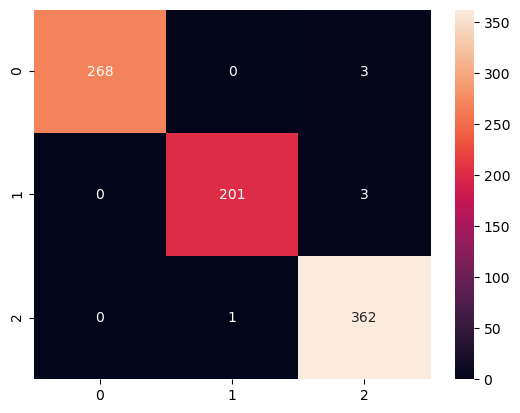

In [39]:
Confusion_Matrix = cnf_matrix(y_test, y_pred)

# CatBoost

In [40]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)
cat.fit(X_train, y_train)

y_pred    = cat.predict(X_test)

cat_acc = accuracy_score(y_pred, y_test)
cat_prec = precision_score(y_pred, y_test,average='weighted')
cat_rec = recall_score(y_pred, y_test,average='weighted')
cat_f1 = f1_score(y_pred, y_test,average='weighted')

0:	learn: 0.9295492	total: 136ms	remaining: 546ms
1:	learn: 0.7914403	total: 141ms	remaining: 212ms
2:	learn: 0.6865490	total: 146ms	remaining: 97.2ms
3:	learn: 0.6007284	total: 150ms	remaining: 37.6ms
4:	learn: 0.5284062	total: 156ms	remaining: 0us


In [41]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(cat, X, y, cv=5)  # 5-Fold Cross Validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

0:	learn: 0.9280390	total: 4.58ms	remaining: 18.3ms
1:	learn: 0.7904633	total: 9.32ms	remaining: 14ms
2:	learn: 0.6850387	total: 13.6ms	remaining: 9.1ms
3:	learn: 0.6018225	total: 18.4ms	remaining: 4.61ms
4:	learn: 0.5323808	total: 23.6ms	remaining: 0us
0:	learn: 0.9300488	total: 4.78ms	remaining: 19.1ms
1:	learn: 0.7926684	total: 9.49ms	remaining: 14.2ms
2:	learn: 0.6883404	total: 14.5ms	remaining: 9.66ms
3:	learn: 0.6036831	total: 19.1ms	remaining: 4.78ms
4:	learn: 0.5329790	total: 24ms	remaining: 0us
0:	learn: 0.9297232	total: 4.3ms	remaining: 17.2ms
1:	learn: 0.7951648	total: 9.08ms	remaining: 13.6ms
2:	learn: 0.6901833	total: 13.4ms	remaining: 8.9ms
3:	learn: 0.6053447	total: 18.1ms	remaining: 4.52ms
4:	learn: 0.5351339	total: 22.9ms	remaining: 0us
0:	learn: 0.9297264	total: 4.2ms	remaining: 16.8ms
1:	learn: 0.7901814	total: 8.61ms	remaining: 12.9ms
2:	learn: 0.6859532	total: 13.1ms	remaining: 8.72ms
3:	learn: 0.6011548	total: 17.6ms	remaining: 4.39ms
4:	learn: 0.5309974	total: 22

In [42]:
storeResults('CATBoost',cat_acc,cat_prec,cat_rec,cat_f1)

-------------------------Confusion_Matrix--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      0.98      0.99       204
           2       0.99      1.00      0.99       363

    accuracy                           0.99       838
   macro avg       1.00      0.99      0.99       838
weighted avg       0.99      0.99      0.99       838



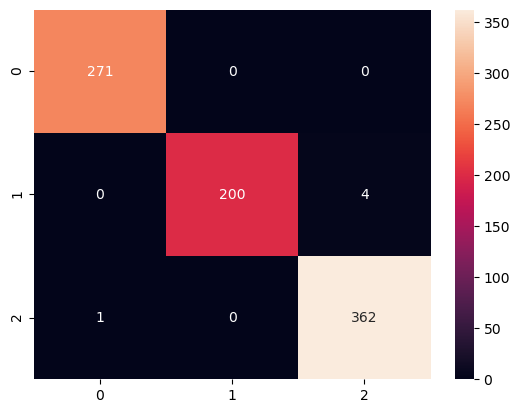

In [43]:
Confusion_Matrix = cnf_matrix(y_test, y_pred)

# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6,learning_rate=0.1,n_estimators=300)
xgb.fit(X_train, y_train)

y_pred    = xgb.predict(X_test)

xgb_acc = accuracy_score(y_pred, y_test)
xgb_prec = precision_score(y_pred, y_test,average='weighted')
xgb_rec = recall_score(y_pred, y_test,average='weighted')
xgb_f1 = f1_score(y_pred, y_test,average='weighted')

In [45]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xgb, X, y, cv=5)  # 5-Fold Cross Validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.99403341 0.98926014 0.99283154 0.99522103 0.99641577]
Mean CV Score: 0.9935523790785936


In [46]:
storeResults('XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1)

-------------------------Confusion_Matrix--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      0.99      0.99       204
           2       0.99      0.99      0.99       363

    accuracy                           1.00       838
   macro avg       1.00      0.99      1.00       838
weighted avg       1.00      1.00      1.00       838



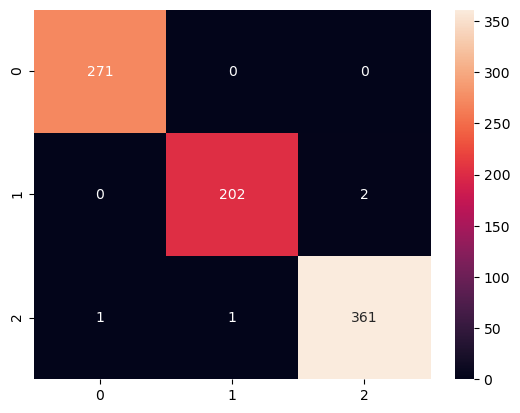

In [47]:
Confusion_Matrix = cnf_matrix(y_test, y_pred)

# Voting classifier

In [48]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()


ext = VotingClassifier(estimators= [('Decision Tree', dt),('Random Forest', rf)], voting='soft')

ext.fit(X_train, y_train)

y_pred = ext.predict(X_test)

ext_acc = accuracy_score(y_pred, y_test)
ext_prec = precision_score(y_pred, y_test,average='weighted')
ext_rec = recall_score(y_pred, y_test,average='weighted')
ext_f1 = f1_score(y_pred, y_test,average='weighted')

In [49]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(ext, X, y, cv=5)  # 5-Fold Cross Validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.99880668 1.         0.99880526 1.         1.        ]
Mean CV Score: 0.9995223878894677


In [50]:
storeResults('Extension',ext_acc,ext_prec,ext_rec,ext_f1)

-------------------------Confusion_Matrix--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00       363

    accuracy                           1.00       838
   macro avg       1.00      1.00      1.00       838
weighted avg       1.00      1.00      1.00       838



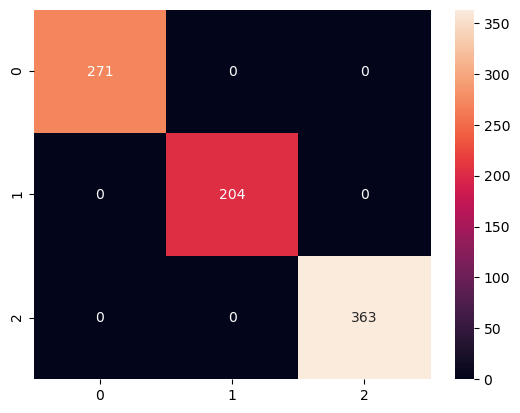

In [51]:
Confusion_Matrix = cnf_matrix(y_test, y_pred)

# LIME

In [52]:
from lime import lime_tabular 

lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), feature_names=X_train.columns, 
            class_names=['0','1','2'], mode='classification')

In [53]:
explanation = lime_explainer.explain_instance(data_row=X_test.iloc[1], predict_fn=ext.predict_proba, top_labels=6, num_features=19)
explanation.show_in_notebook()

# SHAP

In [54]:
import shap

explainer = shap.KernelExplainer(ext.predict,X_test)
shap_values = explainer.shap_values(X_test,nsamples=10)

Using 838 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/838 [00:00<?, ?it/s]

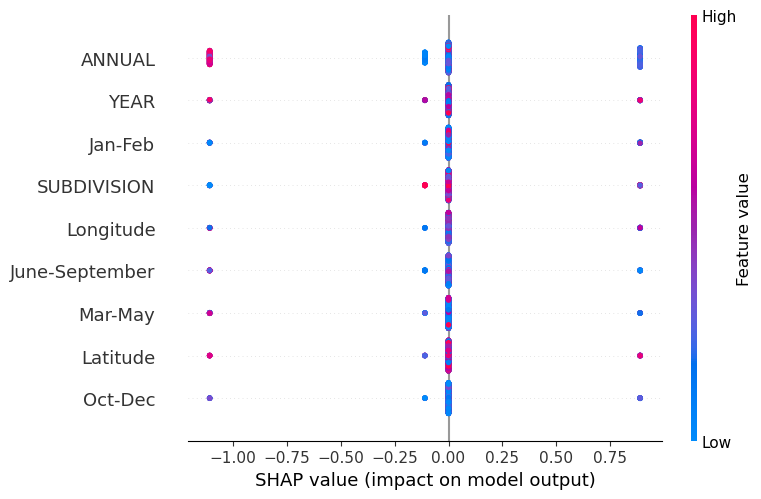

In [55]:
shap.summary_plot(shap_values,X_test,feature_names=X.columns)

# Comparisons

In [56]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [57]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,LogisticRegression,0.981,0.981,0.981,0.981
1,RandomForest,1.000,1.000,1.000,1.000
2,DecisionTree,1.000,1.000,1.000,1.000
3,Neural Network,0.971,0.973,0.971,0.971
4,LightGBM,0.992,0.992,0.992,0.992
5,CATBoost,0.994,0.994,0.994,0.994
6,XGBoost,0.995,0.995,0.995,0.995
7,Extension,1.000,1.000,1.000,1.000


# Modelling

In [60]:
import joblib
filename = 'model.sav'
joblib.dump(ext, filename)

['model.sav']

# Graphs

In [61]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

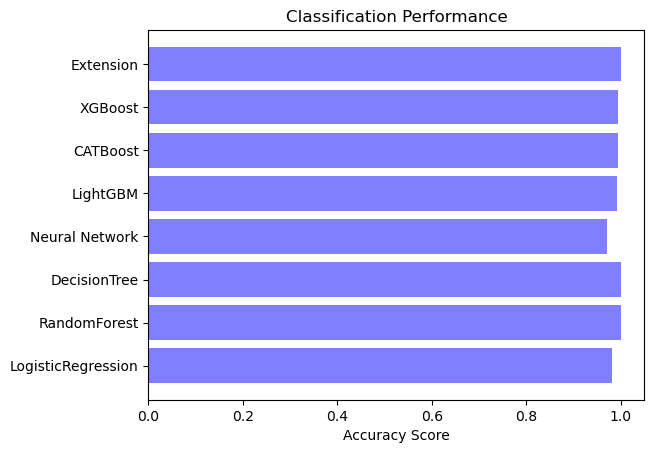

In [62]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

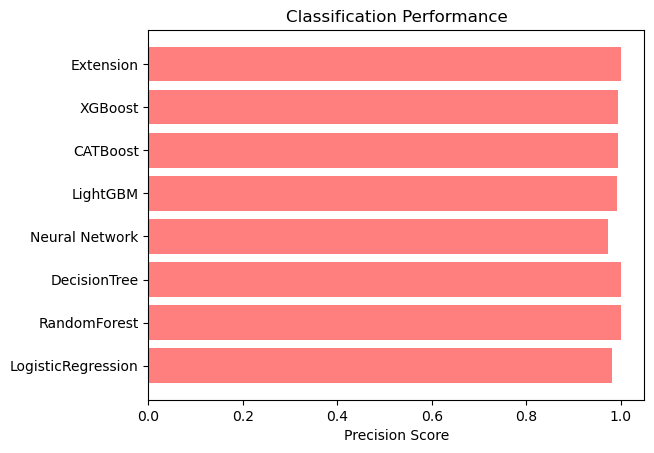

In [63]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

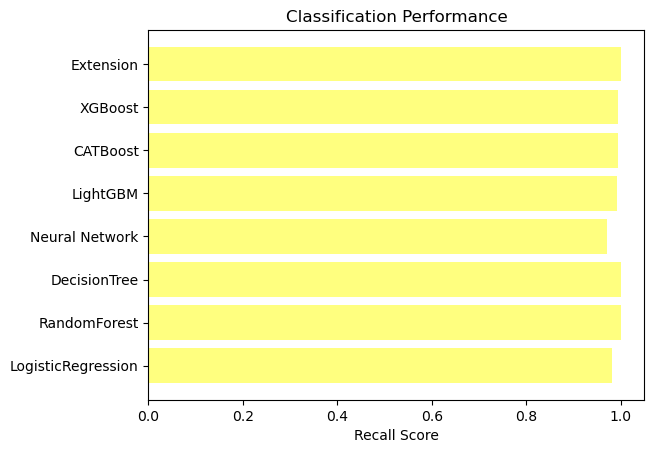

In [64]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

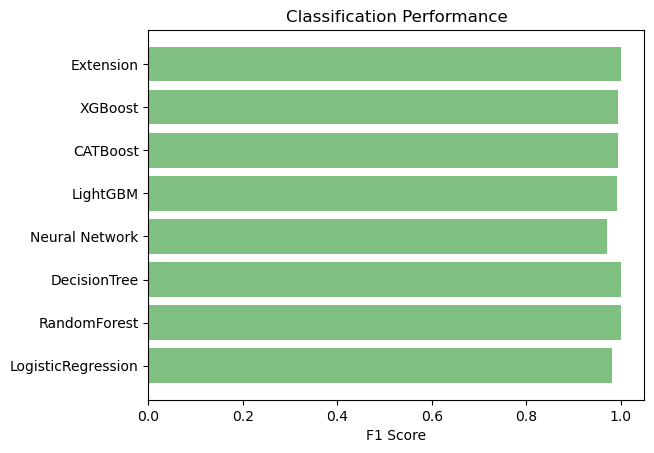

In [65]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()